<a href="https://colab.research.google.com/github/amicarellade/cs4342-finalp/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project 


## Steps



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Dante's repositories 

df = pd.read_csv('/content/drive/MyDrive/CS 4342 ML/Final Project CS4342/Time Americans Spend Sleeping.csv')
# df = pd.read_csv('/content/drive/MyDrive/Time Americans Spend Sleeping.csv')
df

,index,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,Both
1,1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,Both
2,2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,Both
3,3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,Both
4,4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,Both
...,...,...,...,...,...,...,...,...,...
940,940,2013,Annual,8.83,0.085,Nonholiday weekdays,65 years and over,Sleeping,Women
941,941,2014,Annual,8.98,0.086,Nonholiday weekdays,65 years and over,Sleeping,Women
942,942,2015,Annual,8.83,0.074,Nonholiday weekdays,65 years and over,Sleeping,Women
943,943,2016,Annual,8.92,0.071,Nonholiday weekdays,65 years and over,Sleeping,Women


In [ ]:
# Mason's Repositories
from google.colab import files
uploaded = files.upload()

Saving Time Americans Spend Sleeping.csv to Time Americans Spend Sleeping (2).csv


In [ ]:
df = pd.read_csv('Time Americans Spend Sleeping.csv')
df.head()

# EDA

In [11]:
# droppin index column

df.drop('index',axis=1,inplace=True)

([<matplotlib.axis.XTick at 0x7fdb728b1580>,
 <a list of 15 Text major ticklabel objects>)

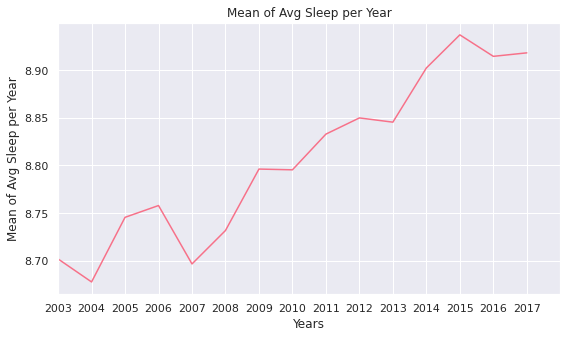

In [ ]:
plt.figure(figsize=(9,5))
sns.set_palette('husl')
plt.plot(df.groupby('Year')['Avg hrs per day sleeping'].mean())
plt.ylabel('Mean of Avg Sleep per Year')
plt.xlabel('Years')
plt.title('Mean of Avg Sleep per Year')
plt.xlim(2003,2018)
plt.xticks([*range(2003,2018)])

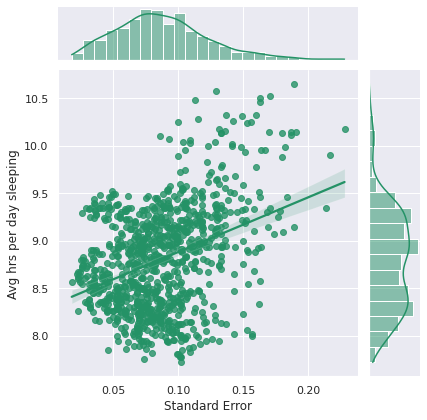

In [ ]:
sns.set_palette('summer')
sns.jointplot(kind='reg',y='Avg hrs per day sleeping',x='Standard Error',data=df)

# One-hot Encode (Option 1)

In [ ]:
df['Sex'].value_counts()

Both     315
Men      315
Women    315
Name: Sex, dtype: int64

In [5]:
# Add One Hot Encoding to ShelveLoc
# df5['Bad'] = np.where((df5.ShelveLoc == 'Bad'), 1, 0)
# df5['Medium'] = np.where((df5.ShelveLoc == 'Medium'), 1, 0)
# df5['Good'] = np.where((df5.ShelveLoc == 'Good'), 1, 0)
# df5 = df5.drop(['ShelveLoc'], axis=1)
# df5

# One-hot encoding Sex category

df['Both'] = np.where((df.Sex == 'Both'), 1, 0)
df['Female'] = np.where((df.Sex == 'Women'), 1, 0)
df['Male'] = np.where((df.Sex == 'Men'), 1, 0)
df = df.drop(['Sex'], axis = 1)
df




,index,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Both,Female,Male
0,0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,1,0,0
1,1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,1,0,0
2,2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,1,0,0
3,3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,1,0,0
4,4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
940,940,2013,Annual,8.83,0.085,Nonholiday weekdays,65 years and over,Sleeping,0,1,0
941,941,2014,Annual,8.98,0.086,Nonholiday weekdays,65 years and over,Sleeping,0,1,0
942,942,2015,Annual,8.83,0.074,Nonholiday weekdays,65 years and over,Sleeping,0,1,0
943,943,2016,Annual,8.92,0.071,Nonholiday weekdays,65 years and over,Sleeping,0,1,0


In [ ]:
df['Type of Days'].value_counts()


All days                     315
Nonholiday weekdays          315
Weekend days and holidays    315
Name: Type of Days, dtype: int64

In [6]:
df['All days'] = np.where((df['Type of Days'] == 'All days'), 1, 0)
df['Weekdays'] = np.where((df['Type of Days'] == 'Nonholiday weekdays'), 1, 0)
df['WeekendsHolidays'] = np.where((df['Type of Days'] == 'Weekend days and holidays'), 1, 0)
df = df.drop(['Type of Days'], axis = 1)
df

,index,Year,Period,Avg hrs per day sleeping,Standard Error,Age Group,Activity,Both,Female,Male,All days,Weekdays,WeekendsHolidays
0,0,2003,Annual,8.57,0.018,15 years and over,Sleeping,1,0,0,1,0,0
1,1,2004,Annual,8.55,0.026,15 years and over,Sleeping,1,0,0,1,0,0
2,2,2005,Annual,8.62,0.023,15 years and over,Sleeping,1,0,0,1,0,0
3,3,2006,Annual,8.63,0.024,15 years and over,Sleeping,1,0,0,1,0,0
4,4,2007,Annual,8.57,0.024,15 years and over,Sleeping,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,940,2013,Annual,8.83,0.085,65 years and over,Sleeping,0,1,0,0,1,0
941,941,2014,Annual,8.98,0.086,65 years and over,Sleeping,0,1,0,0,1,0
942,942,2015,Annual,8.83,0.074,65 years and over,Sleeping,0,1,0,0,1,0
943,943,2016,Annual,8.92,0.071,65 years and over,Sleeping,0,1,0,0,1,0


In [ ]:
df['Age Group'].value_counts()


15 years and over    135
15 to 24 years       135
25 to 34 years       135
35 to 44 years       135
45 to 54 years       135
55 to 64 years       135
65 years and over    135
Name: Age Group, dtype: int64

In [7]:
df['U15'] = np.where((df['Age Group'] == '15 years and over'), 1, 0)
df['15-24'] = np.where((df['Age Group'] == '15 to 24 years'), 1, 0)
df['25-34'] = np.where((df['Age Group'] == '25 to 34 years'), 1, 0)
df['35-44'] = np.where((df['Age Group'] == '35 to 44 years'), 1, 0)
df['45-54'] = np.where((df['Age Group'] == '45 to 54 years'), 1, 0)
df['55-64'] = np.where((df['Age Group'] == '55 to 64 years'), 1, 0)
df['65+'] = np.where((df['Age Group'] == '65 years and over'), 1, 0)
df = df.drop(['Age Group'], axis = 1)
df

,index,Year,Period,Avg hrs per day sleeping,Standard Error,Activity,Both,Female,Male,All days,Weekdays,WeekendsHolidays,U15,15-24,25-34,35-44,45-54,55-64,65+
0,0,2003,Annual,8.57,0.018,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
1,1,2004,Annual,8.55,0.026,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
2,2,2005,Annual,8.62,0.023,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
3,3,2006,Annual,8.63,0.024,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
4,4,2007,Annual,8.57,0.024,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,940,2013,Annual,8.83,0.085,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1
941,941,2014,Annual,8.98,0.086,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1
942,942,2015,Annual,8.83,0.074,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1
943,943,2016,Annual,8.92,0.071,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      945 non-null    int64  
 1   Period                    945 non-null    object 
 2   Avg hrs per day sleeping  945 non-null    float64
 3   Standard Error            945 non-null    float64
 4   Activity                  945 non-null    object 
 5   Both                      945 non-null    int64  
 6   Female                    945 non-null    int64  
 7   Male                      945 non-null    int64  
 8   All days                  945 non-null    int64  
 9   Weekdays                  945 non-null    int64  
 10  WeekendsHolidays          945 non-null    int64  
 11  U15                       945 non-null    int64  
 12  15-24                     945 non-null    int64  
 13  25-34                     945 non-null    int64  
 14  35-44     

In [8]:
df.describe()

,index,Year,Avg hrs per day sleeping,Standard Error,Both,Female,Male,All days,Weekdays,WeekendsHolidays,U15,15-24,25-34,35-44,45-54,55-64,65+
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,472.000000,2010.000000,8.806868,0.086958,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
std,272.942302,4.322782,0.545001,0.034631,0.471654,0.471654,0.471654,0.471654,0.471654,0.471654,0.350112,0.350112,0.350112,0.350112,0.350112,0.350112,0.350112
min,0.000000,2003.000000,7.720000,0.018000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,236.000000,2006.000000,8.360000,0.063000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.000000,2010.000000,8.810000,0.084000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,708.000000,2014.000000,9.190000,0.106000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,944.000000,2017.000000,10.650000,0.228000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#  Finding null value percentage 

pd.DataFrame((100*df.isnull().sum()/len(df)),columns=['Null %'])


,Null %
Year,0.0
Period,0.0
Avg hrs per day sleeping,0.0
Standard Error,0.0
Activity,0.0
Both,0.0
Female,0.0
Male,0.0
All days,0.0
Weekdays,0.0


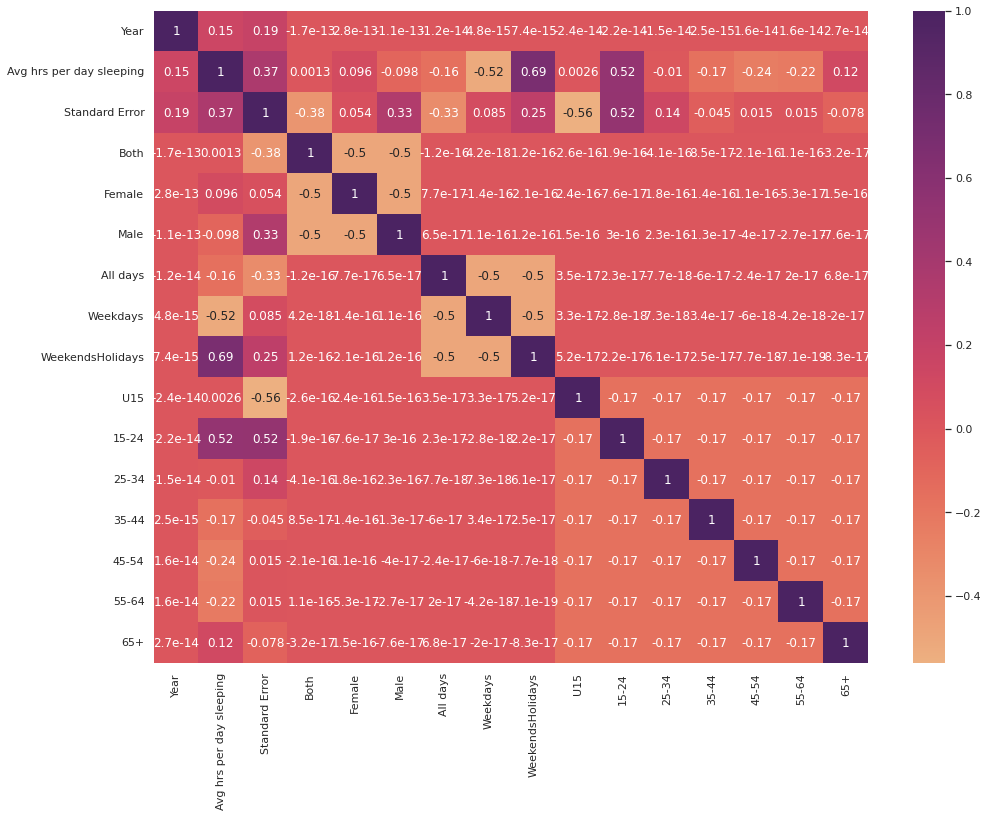

In [ ]:
# Correlation of variables

sns.set(rc={"figure.figsize":(16, 12)}) #width=12, #height=12
sns.heatmap(df.corr(),cmap='flare',annot=True)



# Bagging Regressor

In [9]:
df.rename(columns = {'Avg hrs per day sleeping':'Hours'}, inplace = True)
df.rename(columns = {'Type of Days':'Days'}, inplace = True)
df.rename(columns = {'Age Group':'Age'}, inplace = True)
df

,index,Year,Period,Hours,Standard Error,Activity,Both,Female,Male,All days,Weekdays,WeekendsHolidays,U15,15-24,25-34,35-44,45-54,55-64,65+
0,0,2003,Annual,8.57,0.018,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
1,1,2004,Annual,8.55,0.026,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
2,2,2005,Annual,8.62,0.023,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
3,3,2006,Annual,8.63,0.024,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
4,4,2007,Annual,8.57,0.024,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,940,2013,Annual,8.83,0.085,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1
941,941,2014,Annual,8.98,0.086,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1
942,942,2015,Annual,8.83,0.074,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1
943,943,2016,Annual,8.92,0.071,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1


In [12]:
# Dropping Period, SE, Activity

dfBag = df.drop(columns=['Period','Activity'])
dfBag

,Year,Hours,Standard Error,Both,Female,Male,All days,Weekdays,WeekendsHolidays,U15,15-24,25-34,35-44,45-54,55-64,65+
0,2003,8.57,0.018,1,0,0,1,0,0,1,0,0,0,0,0,0
1,2004,8.55,0.026,1,0,0,1,0,0,1,0,0,0,0,0,0
2,2005,8.62,0.023,1,0,0,1,0,0,1,0,0,0,0,0,0
3,2006,8.63,0.024,1,0,0,1,0,0,1,0,0,0,0,0,0
4,2007,8.57,0.024,1,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2013,8.83,0.085,0,1,0,0,1,0,0,0,0,0,0,0,1
941,2014,8.98,0.086,0,1,0,0,1,0,0,0,0,0,0,0,1
942,2015,8.83,0.074,0,1,0,0,1,0,0,0,0,0,0,0,1
943,2016,8.92,0.071,0,1,0,0,1,0,0,0,0,0,0,0,1


In [13]:
X = dfBag.loc[:, dfBag.columns != 'Hours']
y = dfBag['Hours']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dregr = DecisionTreeRegressor(random_state=0)
dregr.fit(x_train, y_train)
pred = dregr.predict(x_test)
print("The R squared vaule is:", dregr.score(x_test, y_test))
print("The MSE is:", mean_squared_error(y_test, pred))

The R squared vaule is: 0.9310863026332771
The MSE is: 0.019180633802816895


[Text(0.7458876656415125, 0.9705882352941176, '8.67 <= 0.5\nsquared_error = 0.304\nsamples = 661\nvalue = 8.8'),
 Text(0.5536457903319022, 0.9117647058823529, '8.73 <= 0.5\nsquared_error = 0.158\nsamples = 444\nvalue = 8.531'),
 Text(0.44592269030713344, 0.8529411764705882, '8.8 <= 0.5\nsquared_error = 0.098\nsamples = 385\nvalue = 8.433'),
 Text(0.31772467387714665, 0.7941176470588235, '8.6 <= 0.5\nsquared_error = 0.07\nsamples = 324\nvalue = 8.349'),
 Text(0.19117920244385733, 0.7352941176470589, '8.71 <= 0.5\nsquared_error = 0.048\nsamples = 166\nvalue = 8.196'),
 Text(0.13652782364597094, 0.6764705882352942, '8.57 <= 2011.5\nsquared_error = 0.044\nsamples = 133\nvalue = 8.145'),
 Text(0.0913350396301189, 0.6176470588235294, '8.83 <= 0.5\nsquared_error = 0.026\nsamples = 83\nvalue = 8.062'),
 Text(0.06377972258916777, 0.5588235294117647, '8.63 <= 0.5\nsquared_error = 0.021\nsamples = 61\nvalue = 8.113'),
 Text(0.04086856010568032, 0.5, '8.8 <= 0.5\nsquared_error = 0.01\nsamples = 41

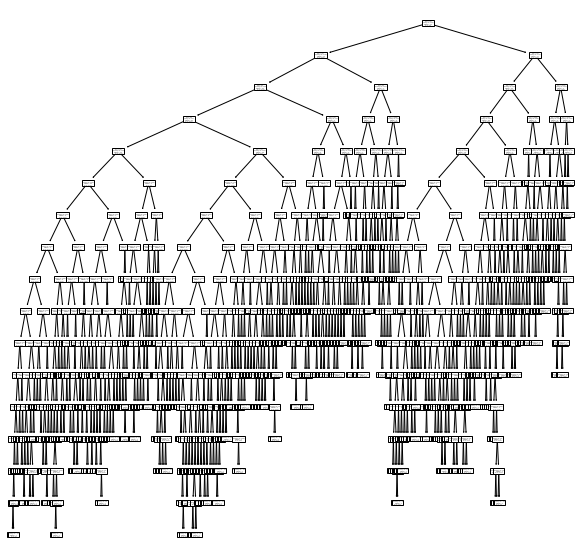

In [16]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(dregr, feature_names=dfBag['Hours'])

In [17]:
cross_val_score(dregr, X, y, cv=20)


array([0.94602369, 0.90970662, 0.91622619, 0.92944809, 0.91999365,
       0.9485818 , 0.81277274, 0.90434955, 0.90671164, 0.73090224,
       0.87549873, 0.79225685, 0.59783449, 0.83578097, 0.91994313,
       0.67293924, 0.90078664, 0.84621869, 0.8378111 , 0.30892607])

Feature: 0, Score: 0.04656
Feature: 1, Score: 0.01373
Feature: 2, Score: 0.00179
Feature: 3, Score: 0.00819
Feature: 4, Score: 0.00493
Feature: 5, Score: 0.04749
Feature: 6, Score: 0.00059
Feature: 7, Score: 0.48540
Feature: 8, Score: 0.01507
Feature: 9, Score: 0.25750
Feature: 10, Score: 0.01809
Feature: 11, Score: 0.00184
Feature: 12, Score: 0.01162
Feature: 13, Score: 0.01464
Feature: 14, Score: 0.07256


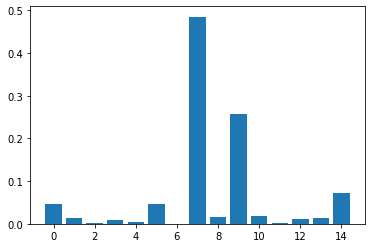

In [21]:
from matplotlib import pyplot
importance = dregr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [19]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

regr = BaggingRegressor(n_estimators=10, random_state=0)
regr.fit(x_train, y_train)
pred = regr.predict(x_test)
print("The R squared vaule is:", regr.score(x_test, y_test))
print("The MSE is:", mean_squared_error(y_test, pred))

The R squared vaule is: 0.9551755698906829
The MSE is: 0.012475908450704225


In [20]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in regr.estimators_
], axis=0)

print(feature_importances)

[0.04616935 0.01720421 0.00097247 0.00890518 0.00658184 0.02850078
 0.02316591 0.48289807 0.01657479 0.25887808 0.02094609 0.00211623
 0.00632208 0.01215377 0.06861114]


In [23]:
# Pruning the tree with removal of features 2, 6, 11
# removal of Both, Weekdays, and 

X = dfBag[['Year', 'Standard Error','Female', 'Male', 'All days','Weekdays', 'WeekendsHolidays', 'U15','15-24', '25-34','55-64', '65+']]
y = dfBag['Hours']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
dregr = DecisionTreeRegressor(random_state=0)
dregr.fit(x_train, y_train)
pred = dregr.predict(x_test)
print("The R squared vaule is:", dregr.score(x_test, y_test))
print("The MSE is:", mean_squared_error(y_test, pred))

The R squared vaule is: 0.9291026285659222
The MSE is: 0.019732746478873242


In [26]:
cross_val_score(dregr, X, y, cv=20)

array([0.94781005, 0.93217379, 0.8862057 , 0.90390997, 0.90682651,
       0.93822617, 0.86218726, 0.89436873, 0.94235802, 0.75779369,
       0.89862564, 0.8190595 , 0.64828718, 0.81918616, 0.93317808,
       0.7166505 , 0.83667692, 0.882772  , 0.83220195, 0.41103154])

[Text(0.7375473682032718, 0.9736842105263158, '8.67 <= 0.5\nsquared_error = 0.304\nsamples = 661\nvalue = 8.8'),
 Text(0.5403764295553563, 0.9210526315789473, '8.71 <= 0.5\nsquared_error = 0.158\nsamples = 444\nvalue = 8.531'),
 Text(0.4321538500555271, 0.868421052631579, '8.8 <= 0.5\nsquared_error = 0.098\nsamples = 385\nvalue = 8.433'),
 Text(0.3032492685375021, 0.8157894736842105, '8.6 <= 0.5\nsquared_error = 0.07\nsamples = 324\nvalue = 8.349'),
 Text(0.17175086494105588, 0.7631578947368421, '8.67 <= 0.5\nsquared_error = 0.042\nsamples = 158\nvalue = 8.51'),
 Text(0.11891604732615753, 0.7105263157894737, '8.73 <= 0.5\nsquared_error = 0.037\nsamples = 128\nvalue = 8.464'),
 Text(0.06339163676746967, 0.6578947368421053, '8.57 <= 2008.5\nsquared_error = 0.022\nsamples = 94\nvalue = 8.396'),
 Text(0.027379121817871176, 0.6052631578947368, '8.62 <= 0.5\nsquared_error = 0.011\nsamples = 38\nvalue = 8.291'),
 Text(0.01717068170169144, 0.5526315789473685, '8.55 <= 0.08\nsquared_error = 0.0

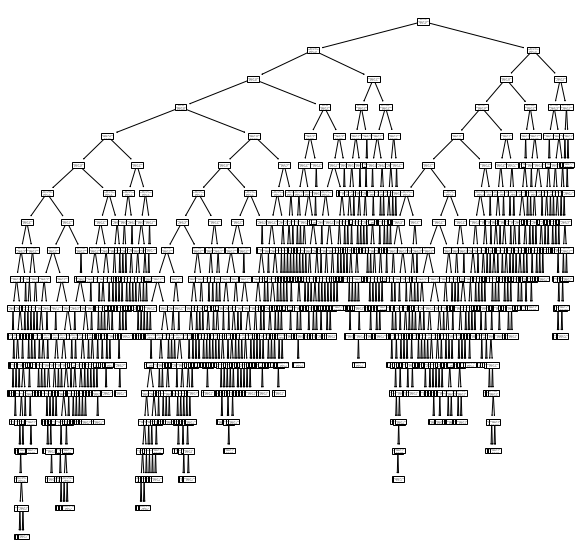

In [27]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(dregr, feature_names=df['Hours'])

In [22]:
regr = BaggingRegressor(n_estimators=10, random_state=0)
regr.fit(x_train, y_train)
pred = regr.predict(x_test)
print("The R squared vaule is:", regr.score(x_test, y_test))
print("The MSE is:", mean_squared_error(y_test, pred))

The R squared vaule is: 0.9551755698906829
The MSE is: 0.012475908450704225


Feature: 0, Score: 0.04721
Feature: 1, Score: 0.01687
Feature: 2, Score: 0.00898
Feature: 3, Score: 0.00629
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.04808
Feature: 6, Score: 0.48543
Feature: 7, Score: 0.01805
Feature: 8, Score: 0.25752
Feature: 9, Score: 0.02216
Feature: 10, Score: 0.01668
Feature: 11, Score: 0.07272


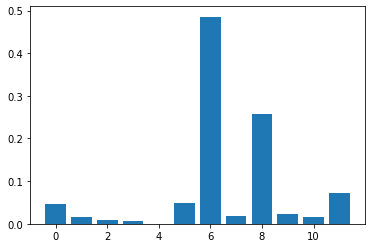

In [28]:
importance = dregr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [32]:
# Pruned Feature 4
# Feature: All days
X = dfBag[['Year', 'Standard Error','Female', 'Male', 'Weekdays', 'WeekendsHolidays', 'U15','15-24', '25-34','55-64', '65+']]
y = dfBag['Hours']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
dregr = DecisionTreeRegressor(random_state=0)
dregr.fit(x_train, y_train)
pred = dregr.predict(x_test)
print("The R squared vaule is:", dregr.score(x_test, y_test))
print("The MSE is:", mean_squared_error(y_test, pred))

The R squared vaule is: 0.927719876170757
The MSE is: 0.020117605633802826


[Text(0.7370466472634211, 0.9736842105263158, '8.6 <= 0.5\nsquared_error = 0.304\nsamples = 661\nvalue = 8.8'),
 Text(0.5383617592216619, 0.9210526315789473, '8.67 <= 0.5\nsquared_error = 0.158\nsamples = 444\nvalue = 8.531'),
 Text(0.429903549217815, 0.868421052631579, '8.74 <= 0.5\nsquared_error = 0.098\nsamples = 385\nvalue = 8.433'),
 Text(0.30178435950589844, 0.8157894736842105, '8.57 <= 0.5\nsquared_error = 0.07\nsamples = 324\nvalue = 8.349'),
 Text(0.1718683215079501, 0.7631578947368421, '8.67 <= 0.5\nsquared_error = 0.042\nsamples = 158\nvalue = 8.51'),
 Text(0.11899737134552915, 0.7105263157894737, '8.71 <= 0.5\nsquared_error = 0.037\nsamples = 128\nvalue = 8.464'),
 Text(0.06343498888698923, 0.6578947368421053, '8.57 <= 2008.5\nsquared_error = 0.022\nsamples = 94\nvalue = 8.396'),
 Text(0.027397845785604377, 0.6052631578947368, '8.62 <= 0.5\nsquared_error = 0.011\nsamples = 38\nvalue = 8.291'),
 Text(0.017182424346042058, 0.5526315789473685, '8.55 <= 0.08\nsquared_error = 0.

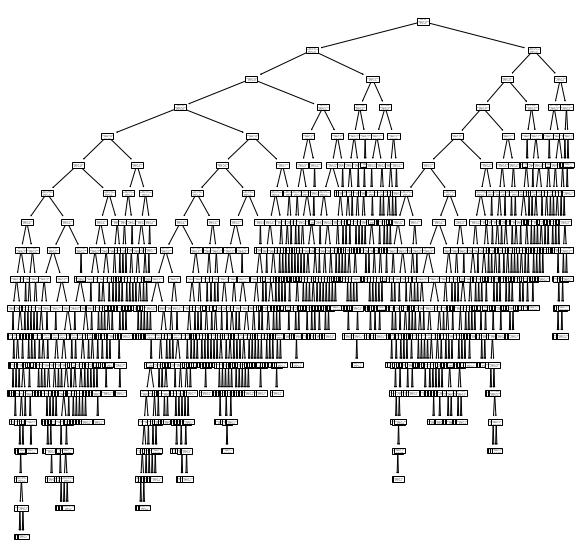

In [34]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(dregr, feature_names=df['Hours'])

Feature: 0, Score: 0.04647
Feature: 1, Score: 0.01811
Feature: 2, Score: 0.00890
Feature: 3, Score: 0.00587
Feature: 4, Score: 0.04808
Feature: 5, Score: 0.48543
Feature: 6, Score: 0.01805
Feature: 7, Score: 0.25752
Feature: 8, Score: 0.02216
Feature: 9, Score: 0.01669
Feature: 10, Score: 0.07272


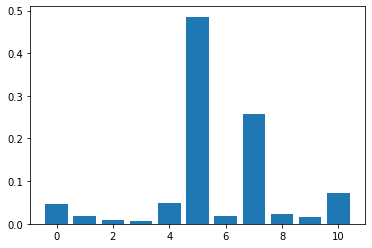

In [35]:
importance = dregr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [36]:
regr = BaggingRegressor(n_estimators=10, random_state=0)
regr.fit(x_train, y_train)
pred = regr.predict(x_test)
print("The R squared vaule is:", regr.score(x_test, y_test))
print("The MSE is:", mean_squared_error(y_test, pred))

The R squared vaule is: 0.9492689905903952
The MSE is: 0.014119876760563376


# One-hot Encode (Option 2)

In [ ]:
column_list = df.keys()
print('Columns List :\n', list(column_list), '\n')

df.rename(columns = {'Avg hrs per day sleeping':'Hours'}, inplace = True)
df.rename(columns = {'Type of Days':'Days'}, inplace = True)
df.rename(columns = {'Age Group':'Age'}, inplace = True)

categorical_features = ['Year', 'Period','Days', 'Age', 'Activity', 'Sex']
categories = df[categorical_features]

print('\nCategorical Feature Values\n')

categories_unique = pd.Series({col: categories[col].unique() for col in categories})
for item in categories_unique.items():
    print(item[0], ':\n', item[1], '\n')

Columns List :
 ['Year', 'Period', 'Avg hrs per day sleeping', 'Standard Error', 'Type of Days', 'Age Group', 'Activity', 'Sex'] 


Categorical Feature Values

Year :
 [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017] 

Period :
 ['Annual'] 

Days :
 ['All days' 'Nonholiday weekdays' 'Weekend days and holidays'] 

Age :
 ['15 years and over' '15 to 24 years' '25 to 34 years' '35 to 44 years'
 '45 to 54 years' '55 to 64 years' '65 years and over'] 

Activity :
 ['Sleeping'] 

Sex :
 ['Both' 'Men' 'Women'] 



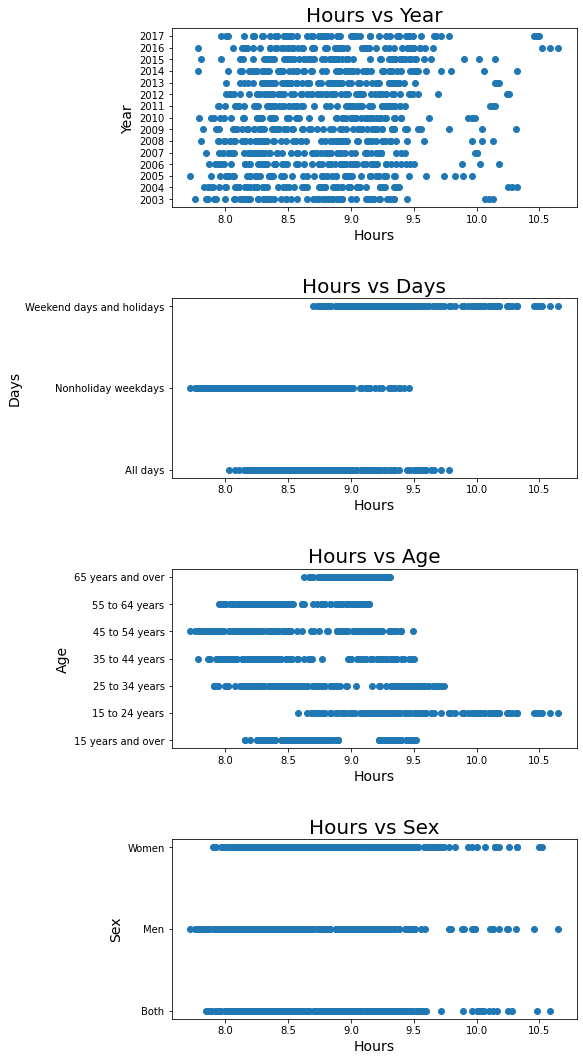

In [ ]:
import matplotlib.pyplot as plt

# Creating scatterplots for 

def createScatter(df, column_x, column_y, ax):
    labels = df[column_y].unique()
    ax.scatter(df[column_x], df[column_y])
    ax.set_yticks(df[column_y].unique())
    ax.set_xlabel(column_x, fontsize=14)
    ax.set_ylabel(column_y, fontsize=14)
    ax.set_title(column_x + ' vs ' + column_y, fontsize=20)


fig, axs = plt.subplots(4, 1, figsize=(8, 16))

fig.tight_layout(pad=7)

ax = axs[0]
createScatter(df, 'Hours', 'Year', ax)
ax = axs[1]
createScatter(df, 'Hours', 'Days', ax)
ax = axs[2]
createScatter(df, 'Hours', 'Age', ax)
ax = axs[3]
createScatter(df, 'Hours', 'Sex', ax)

plt.show()

In [ ]:
# one hot encode using sklearn

from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(handle_unknown='ignore', dtype=int)
df_encoded = pd.DataFrame(oh_encoder.fit_transform(df[['Days','Age','Sex']]).toarray(), columns=oh_encoder.get_feature_names_out())

# Concat the encoded data frame and the original
df_new = pd.concat([df.reset_index(drop=True),df_encoded.reset_index(drop=True)], axis=1)
df_new.drop(['Days','Age','Sex'], axis=1, inplace=True)

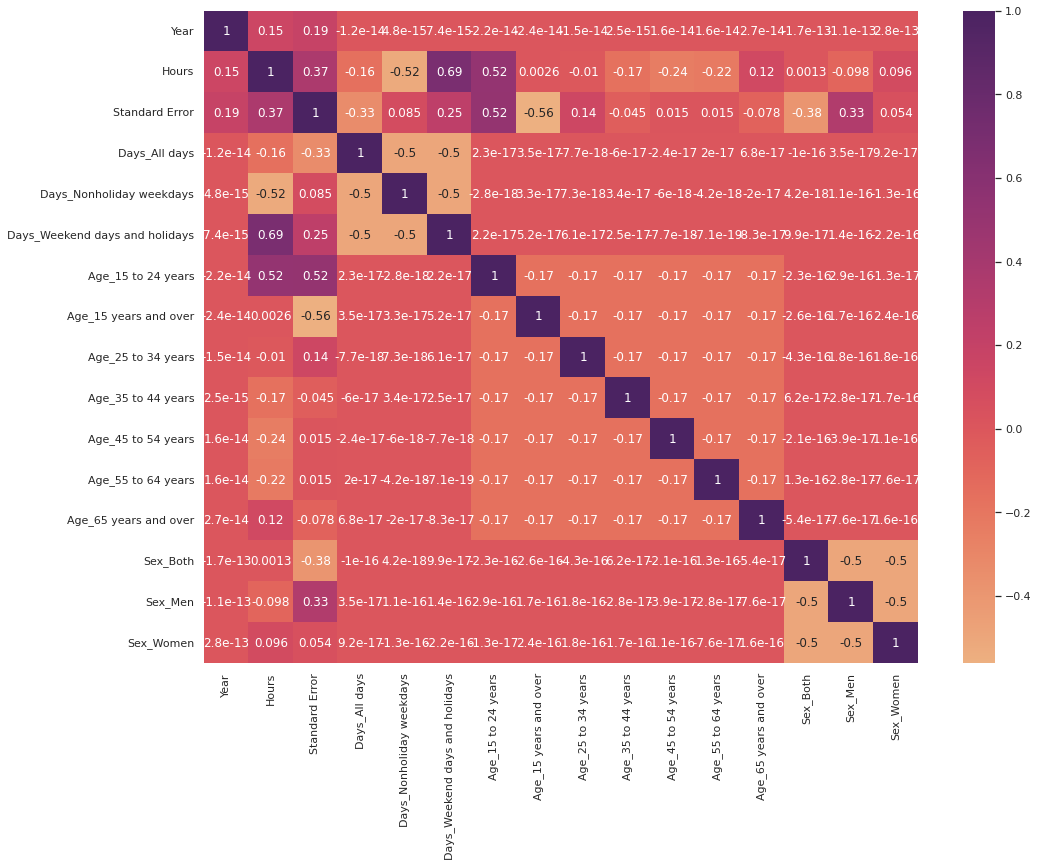

In [ ]:
sns.set(rc={"figure.figsize":(16, 12)}) #width=12, #height=12
sns.heatmap(df_new.corr(),cmap='flare',annot=True)

# KNN Regression

In [ ]:
# Change dataframe name and drop 'Period' column
dfK = df
dfK.head()

In [ ]:
# Drop period and activity columns
dfK.drop('Period',axis=1,inplace=True)
dfK.drop('Activity',axis=1,inplace=True)

In [ ]:
# Define X and Y 
x = dfK.loc[:, df.columns != 'Avg hrs per day sleeping']
y = dfK['Avg hrs per day sleeping']

In [ ]:
# Train Test Slpit 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# KNN with 1 Neighbor
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(x_train, y_train)
pred = neigh.predict(x_test)
print("The training score for KNN Regression with 1 neighbor is: ", neigh.score(x_train, y_train))
print("The testing score for KNN Regression with 1 neighbor is: ", neigh.score(x_test, y_test))
print("The MSE is:", mean_squared_error(y_test, pred))

The training score for KNN Regression with 1 neighbor is:  1.0
The testing score for KNN Regression with 1 neighbor is:  0.7614644584988348
The MSE is: 0.06639119718309858


In [ ]:
# KNN with 2 Neighbors
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_train, y_train)
pred = neigh.predict(x_test)
print("The training score for KNN Regression with 2 neighbors is: ", neigh.score(x_train, y_train))
print("The testing score for KNN Regression with 2 neighbors is: ", neigh.score(x_test, y_test))
print("The MSE is:", mean_squared_error(y_test, pred))

The training score for KNN Regression with 2 neighbors is:  0.9599145922884951
The testing score for KNN Regression with 2 neighbors is:  0.7051331121240727
The MSE is: 0.08206980633802817


In [ ]:
# KNN with 3 Neighbors
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train, y_train)
pred = neigh.predict(x_test)
print("The training score for KNN Regression with 3 neighbors is: ", neigh.score(x_train, y_train))
print("The testing score for KNN Regression with 3 neighbors is: ", neigh.score(x_test, y_test))
print("The MSE is:", mean_squared_error(y_test, pred))

The training score for KNN Regression with 3 neighbors is:  0.9030889052272595
The testing score for KNN Regression with 3 neighbors is:  0.6795508925736431
The MSE is: 0.08919006259780903


In [ ]:
# KNN with 4 Neighbors
neigh = KNeighborsRegressor(n_neighbors=4)
neigh.fit(x_train, y_train)
pred = neigh.predict(x_test)
print("The training score for KNN Regression with 4 neighbors is: ", neigh.score(x_train, y_train))
print("The testing score for KNN Regression with 4 neighbors is: ", neigh.score(x_test, y_test))
print("The MSE is:", mean_squared_error(y_test, pred))

The training score for KNN Regression with 4 neighbors is:  0.8562731301589841
The testing score for KNN Regression with 4 neighbors is:  0.70236594689228
The MSE is: 0.08283998679577459


In [ ]:
# KNN with 5 Neighbors
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train, y_train)
pred = neigh.predict(x_test)
print("The training score for KNN Regression with 5 neighbors is: ", neigh.score(x_train, y_train))
print("The testing score for KNN Regression with 5 neighbors is: ", neigh.score(x_test, y_test))
print("The MSE is:", mean_squared_error(y_test, pred))

The training score for KNN Regression with 5 neighbors is:  0.8454242653107447
The testing score for KNN Regression with 5 neighbors is:  0.7113012884419931
The MSE is: 0.080353028169014


# Ridge Regression 



In [ ]:
import statsmodels.api       as sm

x_features = list(df_new.keys())
x_features.remove('Hours') # removing hours from predictors
x_features.remove('Period') # removing period from predictors
x_features.remove('Activity') # removing activity from predictors
x_features.remove('Standard Error') # removing SE from predictors
y_feature = ['Hours']

df_x = df_new[x_features]
df_y = df_new[y_feature]

In [ ]:
from sklearn.linear_model import Ridge
from sklearn import metrics

def ridge_regression(X_train, X_test, y_train, y_test, alpha):
    # Fit the model
    ridgereg = Ridge(alpha=alpha, normalize=True)
    ridgereg.fit(X_train, y_train)
    y_pred = ridgereg.predict(X_test)

    print("\n***Ridge Regression Coefficients ** alpha=" + str(alpha))
    print(ridgereg.intercept_)
    print(ridgereg.coef_)
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y,test_size=0.2, random_state=0)


# creating a function to have Ridge run through different regularization strengths
alphaValues = [0,  0.2, 0.5, 0.7] 
for i in range(0, len(alphaValues)):
    ridge_regression(X_train, X_test, y_train, y_test,
                     alphaValues[i])


***Ridge Regression Coefficients ** alpha=0
[-30.51561314]
[[ 0.01956326 -0.12043763 -0.40918132  0.52890063  0.70406524  0.00413592
  -0.0254007  -0.21743281 -0.31461305 -0.2993102   0.14860134  0.00421592
  -0.07754741  0.07482273]]
Root Mean Squared Error: 0.1740362781045141

***Ridge Regression Coefficients ** alpha=0.2
[-24.47276504]
[[ 1.65570244e-02 -1.06968089e-01 -3.61587335e-01  4.67917444e-01
   6.03348661e-01 -1.09030516e-05 -2.35247402e-02 -1.84757231e-01
  -2.67976540e-01 -2.54707034e-01  1.27623060e-01  4.33766231e-03
  -6.91475464e-02  6.61266346e-02]]
Root Mean Squared Error: 0.17880719396714756

***Ridge Regression Coefficients ** alpha=0.5
[-18.26778428]
[[ 0.01347013 -0.09156714 -0.30785203  0.39887304  0.49687672 -0.00334186
  -0.02099785 -0.15072345 -0.2191818  -0.20810078  0.10542519  0.0042584
  -0.05948239  0.05634488]]
Root Mean Squared Error: 0.2080909070348739

***Ridge Regression Coefficients ** alpha=0.7
[-15.28437466]
[[ 0.01198592 -0.08353663 -0.2800951

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

# New Section